# INSTALING REQUIRED LIBRARIES

In [2]:
!pip install missingno
!pip install tensorflow

# IMPORTS

In [3]:
import pandas as pd
import glob
import os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.base import BaseEstimator, TransformerMixin
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#  libraries for tensor flow
import tensorflow as tf
from tensorflow import keras




# READING .CSV FILES

WE FIRST IMPORT DATASET FOR THE CONTROL GROUP, I.E CONTROL GROUP

In [4]:
# Get data file names
path = r"C:\Users\Akshay Mohan Nair\OneDrive - University of Essex\Spring Term\Decision Making\Assignment_2\unzipped\EyeT"
filenames = glob.glob(path + "/*dataset_II*.csv")
filenames = [file for file in filenames if "dataset_III" not in file]

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
big_frame_dataset_II = pd.concat(dfs, ignore_index=True)

EXTRACTING NUMERICAL VALUE FOR THE PARTICIPANT CODE

In [5]:
# Extract the last numeric characters from 'Participant name' column
big_frame_dataset_II['Participant name'] = big_frame_dataset_II['Participant name'].str[-2:]

In [6]:
big_frame_dataset_II.head()

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
0,667,4394847,2575955327,NaN,Participant10,29.10.2020,10,Recording1,29.10.2020,29.10.2020,...,NaN,Unclassified,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
1,668,4394847,2575955327,NaN,Participant10,29.10.2020,10,Recording1,29.10.2020,29.10.2020,...,NaN,Unclassified,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2,669,4400762,2575961242,Eye Tracker,Participant10,29.10.2020,10,Recording1,29.10.2020,29.10.2020,...,416.0,Saccade,25.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN
3,670,4409117,2575969597,Eye Tracker,Participant10,29.10.2020,10,Recording1,29.10.2020,29.10.2020,...,416.0,Saccade,25.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN
4,671,4417439,2575977919,Eye Tracker,Participant10,29.10.2020,10,Recording1,29.10.2020,29.10.2020,...,416.0,Saccade,25.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
big_frame_dataset_II.shape

(1067562, 71)

# DROPPING ROWS WITH NULL VALUES IN DIAMETER COLUMN

In [8]:
big_frame_dataset_II = big_frame_dataset_II.dropna(subset=['Pupil diameter left', 'Pupil diameter right'])
big_frame_dataset_II.shape

(227371, 71)

In [9]:
big_frame_dataset_II.to_csv('big_frame_dataset_II.csv')

In [10]:
big_frame_dataset_II.head()

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
7,674,4442481,2576002961,Eye Tracker,Participant10,29.10.2020,10,Recording1,29.10.2020,29.10.2020,...,416.0,Saccade,17.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN
51,718,4742444,2576302924,Eye Tracker,Participant10,29.10.2020,10,Recording1,29.10.2020,29.10.2020,...,416.0,Saccade,125.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
55,722,4767457,2576327937,Eye Tracker,Participant10,29.10.2020,10,Recording1,29.10.2020,29.10.2020,...,416.0,Saccade,125.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
60,727,4792442,2576352922,Eye Tracker,Participant10,29.10.2020,10,Recording1,29.10.2020,29.10.2020,...,416.0,Saccade,125.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
64,731,4817422,2576377902,Eye Tracker,Participant10,29.10.2020,10,Recording1,29.10.2020,29.10.2020,...,416.0,Saccade,125.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN


# GRAPHS

BELOW GRAPH SHOWS PERCENTAGE OF NULL VALUES IN ALL THE COLUMNS OF THE DATASET.

<Axes: >

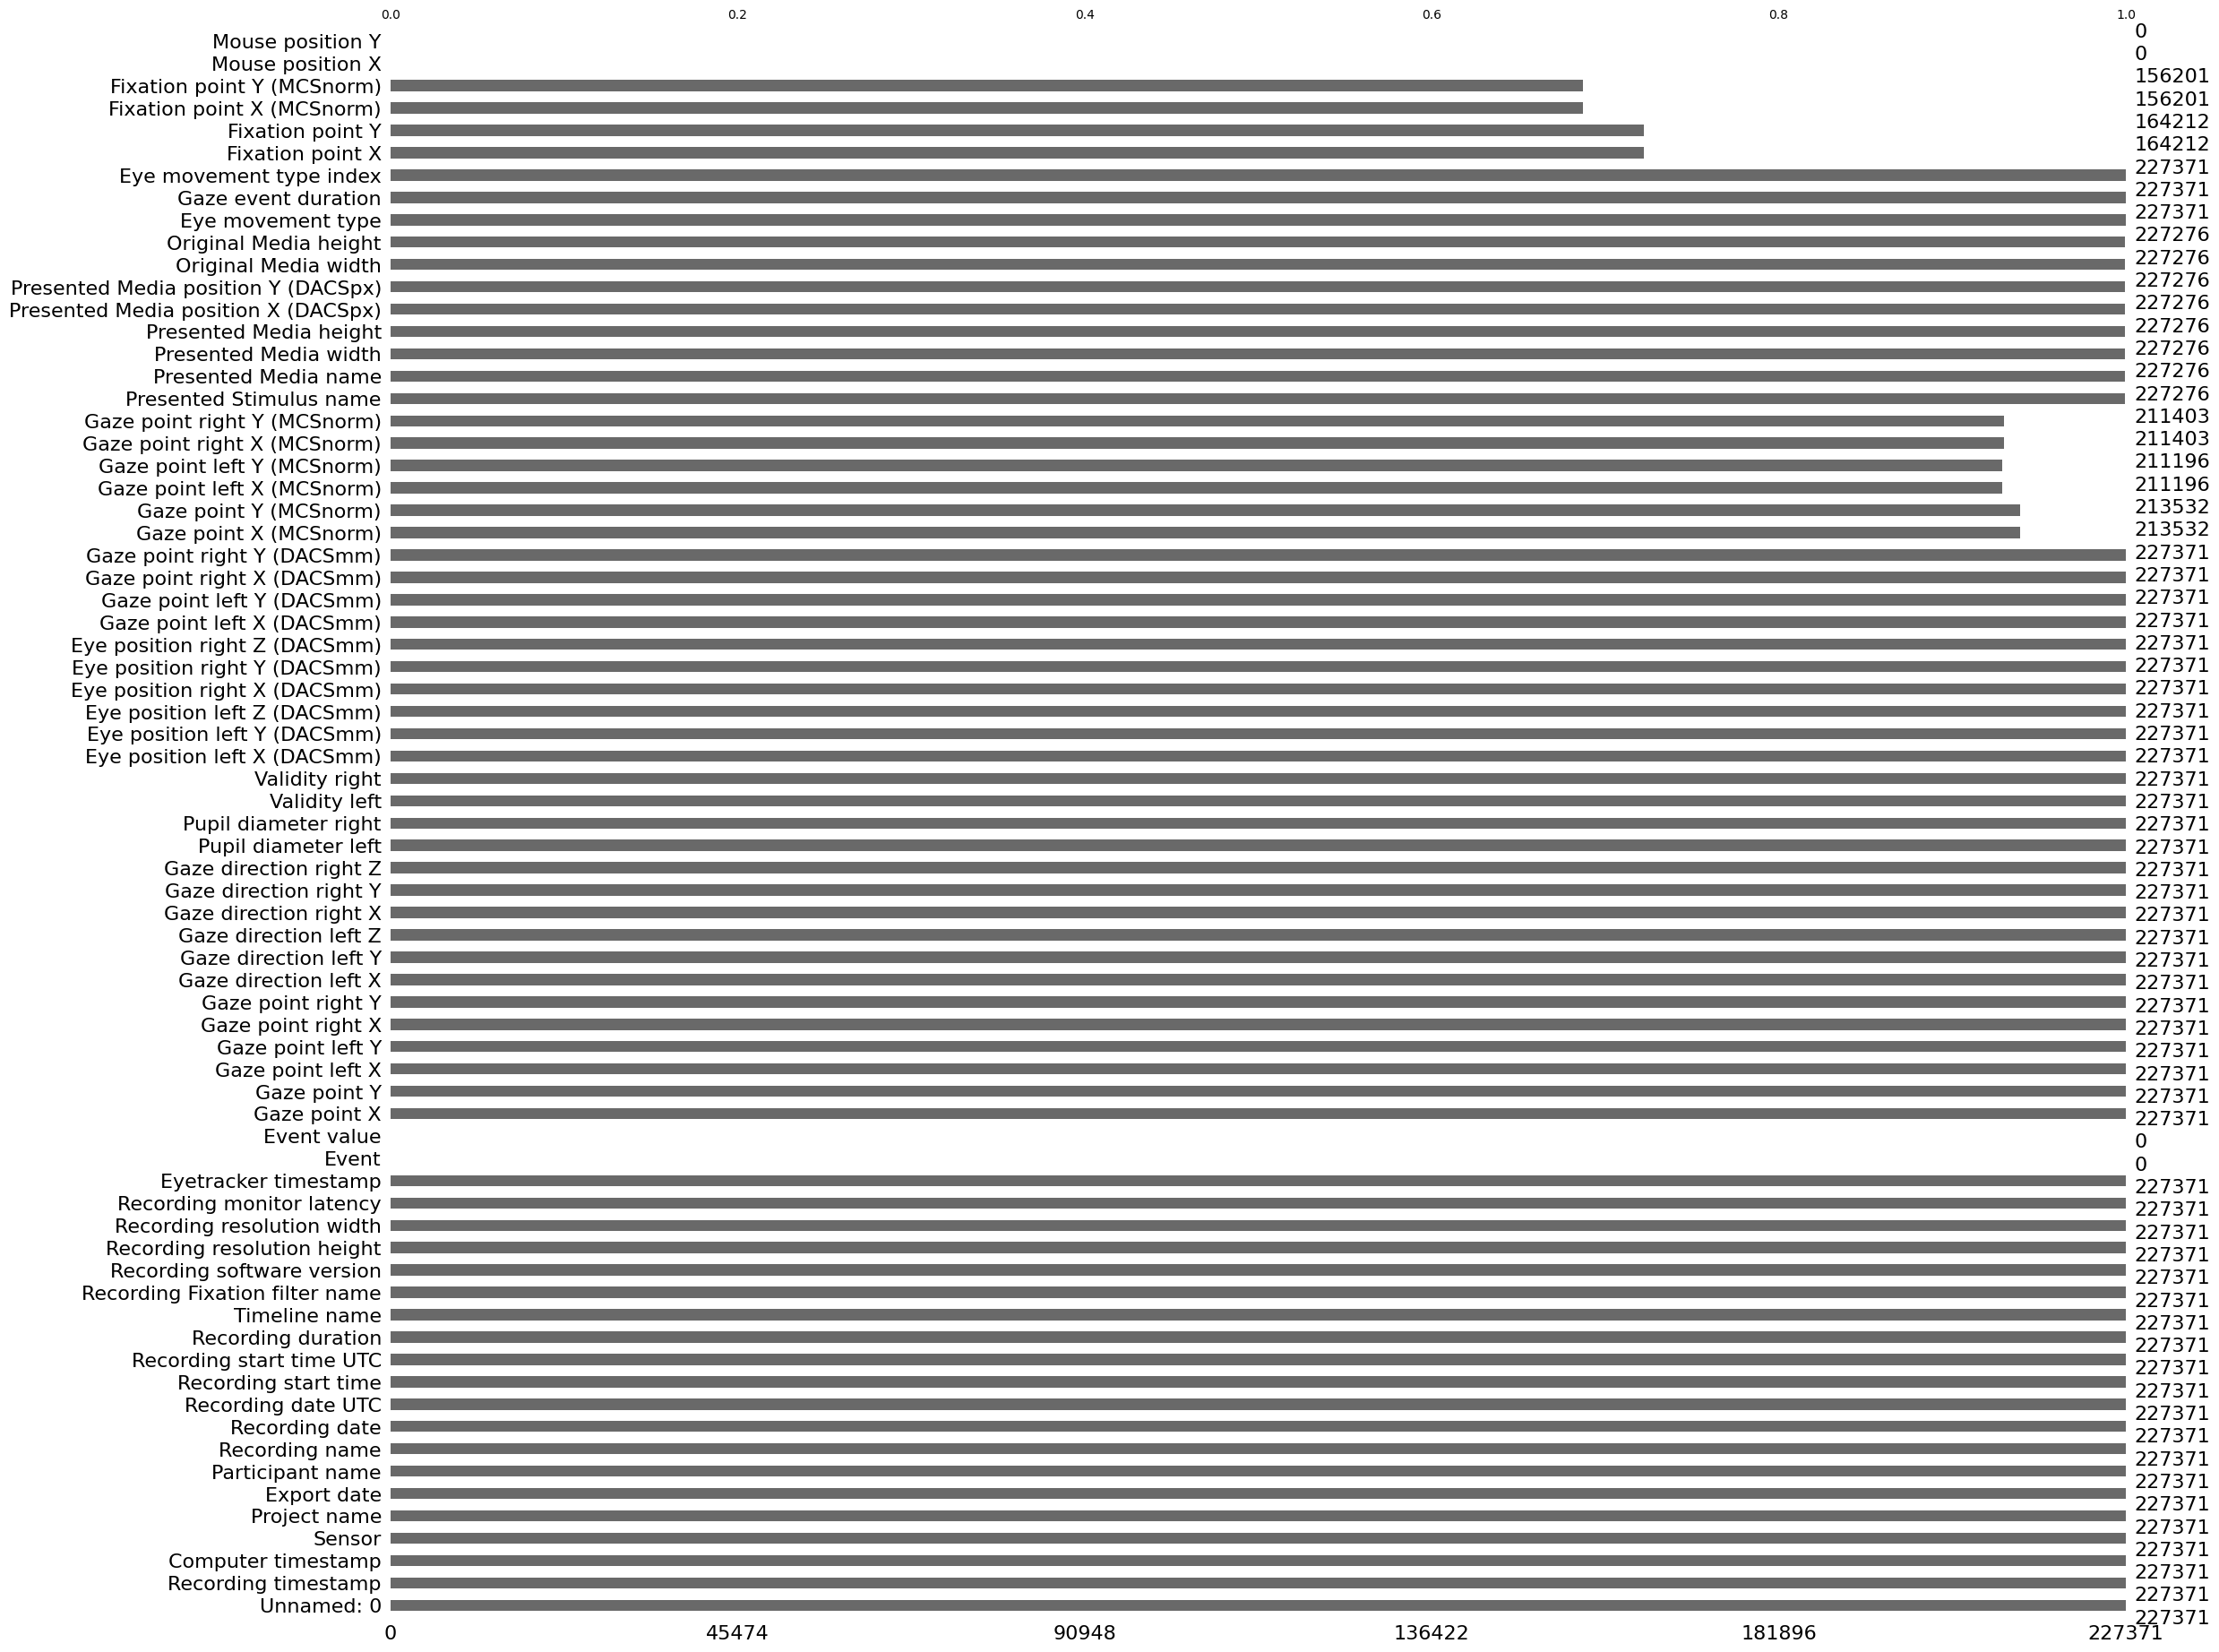

In [11]:
msno.bar(big_frame_dataset_II)

GRAPH FOR THE FLUCTUATION IN LEFT EYE'S PUPIL DIAMETER WITH RESPECT TO TIMESTAMP.

<Axes: xlabel='Pupil diameter left'>

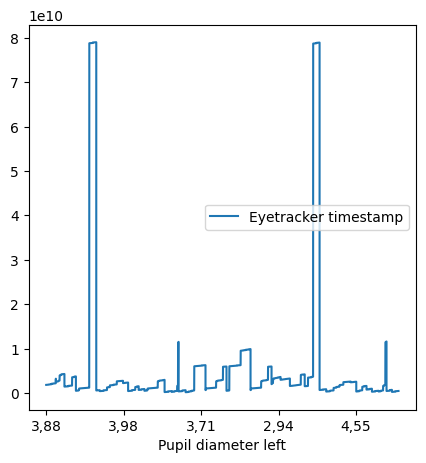

In [12]:
big_frame_dataset_II.plot(x="Pupil diameter left",y= "Eyetracker timestamp", kind="line", figsize=(5, 5))

GRAPH FOR THE FLUCTUATION IN RIGHT EYE'S PUPIL DIAMETER WITH RESPECT TO TIMESTAMP.

<Axes: xlabel='Pupil diameter right'>

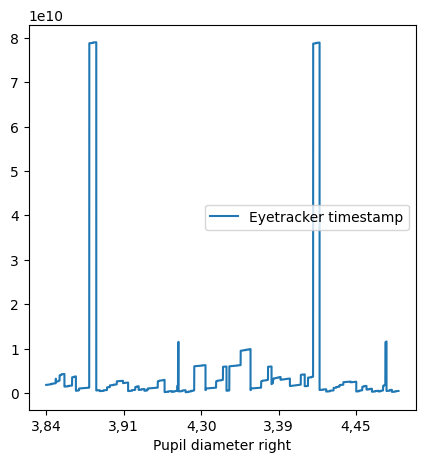

In [13]:
big_frame_dataset_II.plot(x="Pupil diameter right",y= "Eyetracker timestamp", kind="line", figsize=(5, 5))

CORELATION MATRIX FOR THE WHOLE DATASET

C:\Users\Akshay Mohan Nair\AppData\Local\Temp\ipykernel_24020\3228754495.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_co=big_frame_dataset_II.corr()


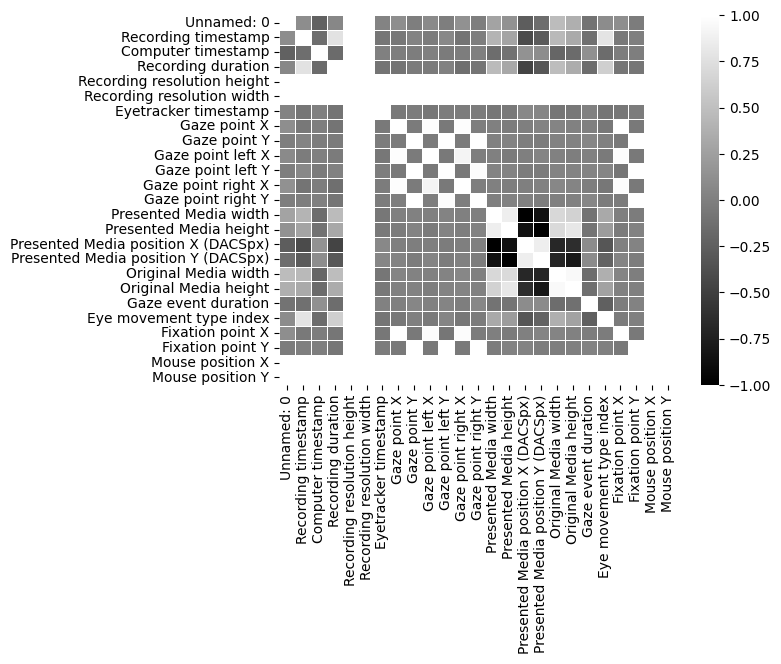

In [14]:
matrix_co=big_frame_dataset_II.corr()
sns.heatmap(matrix_co, cmap="gist_gray",linewidth=.5) #cmap = 'crest' for B and W heatmap
plt.show()

BAR GRAPH FOR THE COLUMNS IN THE DATASET.

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Recording timestamp'}>,
        <Axes: title={'center': 'Computer timestamp'}>,
        <Axes: title={'center': 'Recording duration'}>,
        <Axes: title={'center': 'Recording resolution height'}>],
       [<Axes: title={'center': 'Recording resolution width'}>,
        <Axes: title={'center': 'Eyetracker timestamp'}>,
        <Axes: title={'center': 'Gaze point X'}>,
        <Axes: title={'center': 'Gaze point Y'}>,
        <Axes: title={'center': 'Gaze point left X'}>],
       [<Axes: title={'center': 'Gaze point left Y'}>,
        <Axes: title={'center': 'Gaze point right X'}>,
        <Axes: title={'center': 'Gaze point right Y'}>,
        <Axes: title={'center': 'Presented Media width'}>,
        <Axes: title={'center': 'Presented Media height'}>],
       [<Axes: title={'center': 'Presented Media position X (DACSpx)'}>,
        <Axes: title={'center': 'Presented Media position Y (DACSpx)'}>,
      

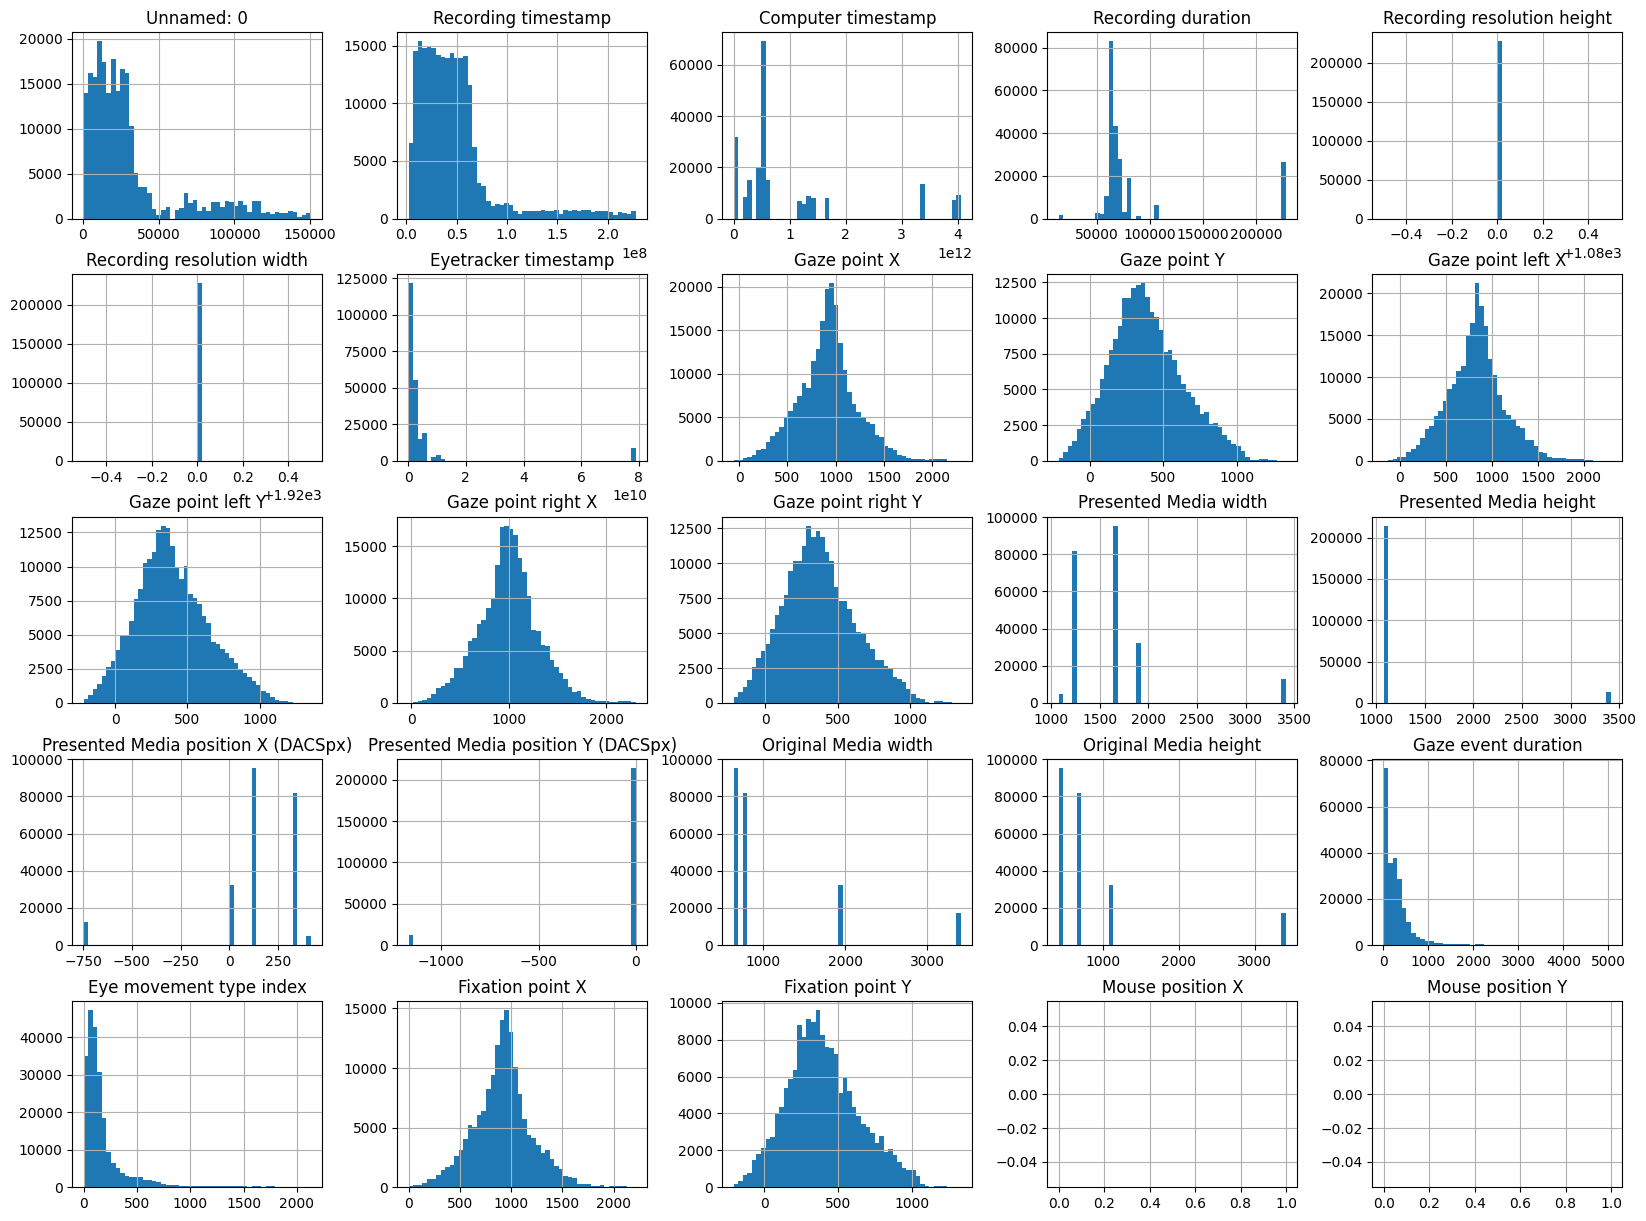

In [15]:
big_frame_dataset_II.hist(bins=50, figsize=(20,15))

PIE CHART FOR THE DIFFERENT VALUES IN THE COLUMN 'Eye movement type'

Fixation        164212
Saccade          38933
Unclassified     24226
Name: Eye movement type, dtype: int64


<Axes: ylabel='EYE MOVEMENT TYPE VALUE COUNTS'>

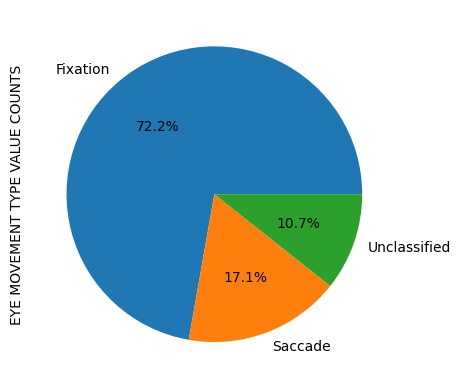

In [16]:
pie_chart = big_frame_dataset_II['Eye movement type'].value_counts(dropna=False)
print(pie_chart)
pie_chart.plot(kind="pie", autopct='%1.1f%%',    ylabel='EYE MOVEMENT TYPE VALUE COUNTS')

BELOW TABLE SHOWS THAT THE ADDED VALUE OF "GAZE POINT LEFT X" AND "SUM OF GAZE POINT RIGHT X" IS EQUAL TO "GAZE POINT X".

In [17]:
#Checking Values of Gaze Point X and Its Combined Value of Left and Right Eye
check_gaze = pd.DataFrame()
check_gaze['Added_value']=(big_frame_dataset_II['Gaze point left X']+ big_frame_dataset_II['Gaze point right X'])/2
check_gaze['Gaze point X'] = big_frame_dataset_II['Gaze point X']
check_gaze.head()


,Added_value,Gaze point X
7,1700.5,1701.0
51,1625.0,1625.0
55,1475.5,1475.0
60,1286.5,1286.0
64,1100.5,1101.0


BELOW CODE SHOWS THAT THE VALUE OF SUM OF "GAZE POINT LEFT X" AND "SUM OF GAZE POINT RIGHT X" IS EQUAL TO GAZE POINT X. THEREFORE THERE IS NO POINT IN TAKING THESE INDIVIDUAL COLUMNS INTO OUT FINAL DATASET.

THE VIOLET LINE JUST SHOWS THAT THE VALUES PERFECTLY OVERLAP EACH OTHER AS THE INDIVUAL COLOURS VALUES FOR THE LINES WERE RED AND BLUE.

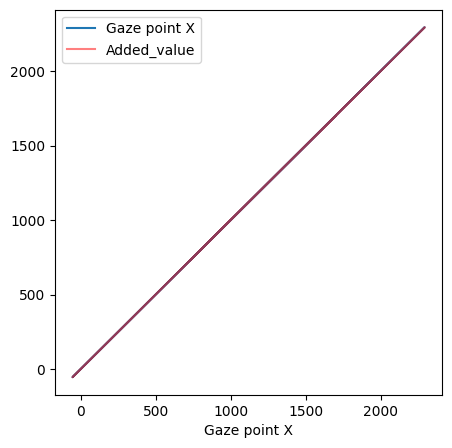

In [18]:
fig, ax = plt.subplots(figsize=(5,5))
check_gaze.plot(x="Added_value",kind="line", ax=ax)
check_gaze.plot(x="Gaze point X",kind="line", color="r", ax=ax,alpha=0.5)
plt.show()


# SELECTING FEATURES

FROM THE ABOVE GRAPH WE DECIDE TO SELECT THE BELOW FEATURES FROM OUR INTIAL DATASET FOR THE MODEL TO TRAIN UPON.

In [19]:
Selected_features = ['Participant name', 
                      'Gaze point X (MCSnorm)', 'Gaze point Y (MCSnorm)', 'Gaze event duration',
                     'Pupil diameter left','Pupil diameter right']

WE CONVERT THE PARTICIPANT NAME COLUMN'S DATATYPE TO INT FOR EASIER DATA MANIPULATION.

In [20]:
main_df_dataset_II = big_frame_dataset_II[Selected_features].copy(deep=True)
main_df_dataset_II['Participant name'] = main_df_dataset_II['Participant name'].astype(int)

In [21]:
main_df_dataset_II.head()

,Participant name,Gaze point X (MCSnorm),Gaze point Y (MCSnorm),Gaze event duration,Pupil diameter left,Pupil diameter right
7,10,NaN,NaN,17.0,"3,88","3,84"
51,10,"0,9003","0,9897",125.0,"3,81","3,84"
55,10,"0,8102","0,8220",125.0,"3,85","3,77"
60,10,"0,6963","0,6025",125.0,"3,79","4,11"
64,10,"0,5846","0,4354",125.0,"3,78","3,80"


In [22]:
main_df_dataset_II.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227371 entries, 7 to 1067559
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Participant name        227371 non-null  int32  
 1   Gaze point X (MCSnorm)  213532 non-null  object 
 2   Gaze point Y (MCSnorm)  213532 non-null  object 
 3   Gaze event duration     227371 non-null  float64
 4   Pupil diameter left     227371 non-null  object 
 5   Pupil diameter right    227371 non-null  object 
dtypes: float64(1), int32(1), object(4)
memory usage: 11.3+ MB


In [23]:
print(main_df_dataset_II.shape)

(227371, 6)


In [24]:
main_df_dataset_II.isna().sum()

Participant name              0
Gaze point X (MCSnorm)    13839
Gaze point Y (MCSnorm)    13839
Gaze event duration           0
Pupil diameter left           0
Pupil diameter right          0
dtype: int64

BELOW GRAPH SHOWS THE PERCENTAGE OF NULL VALUES IN THE SELECTED FEATURES.

<Axes: >

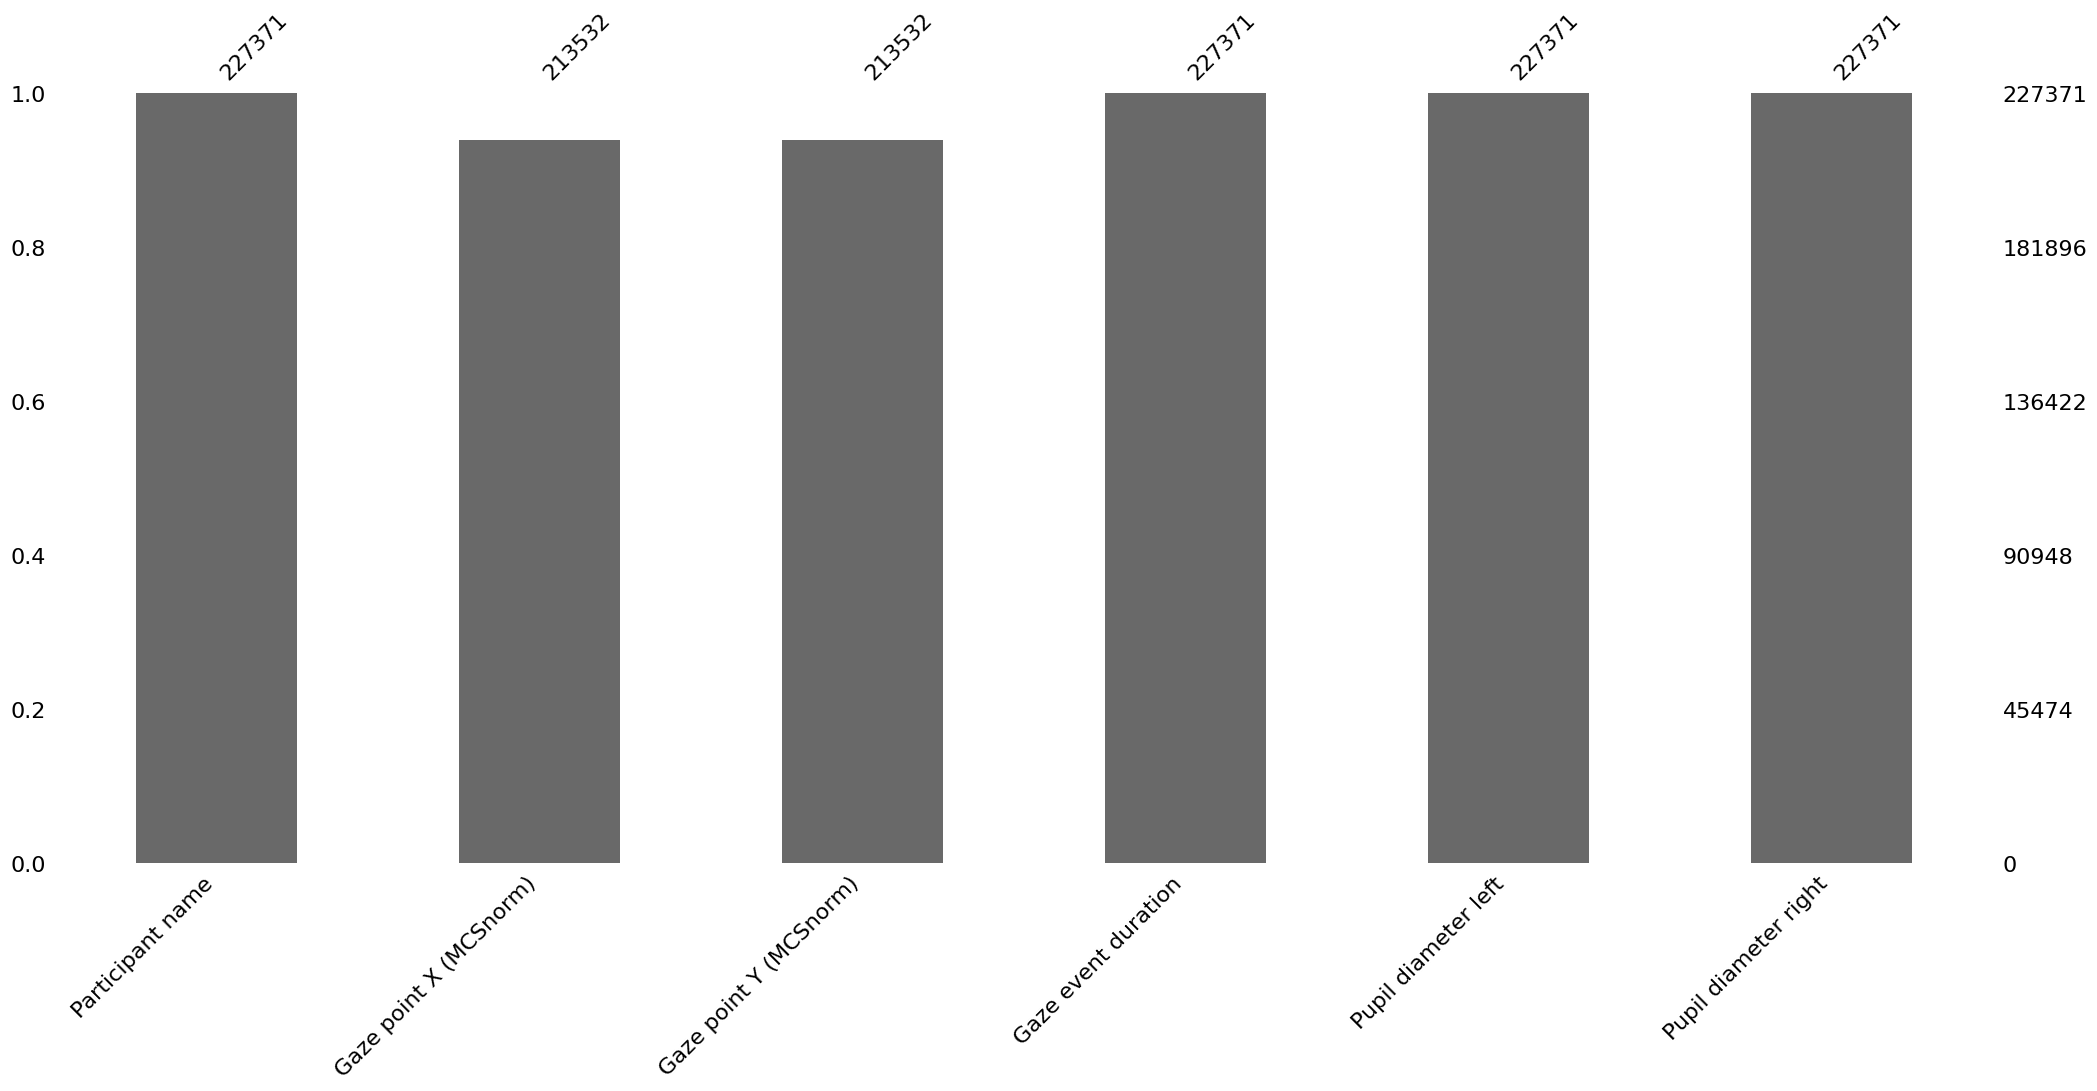

In [25]:
msno.bar(main_df_dataset_II)

# REMOVING DUPLICATE ROWS

THE BELOW CODE SNIPPET REMOVES ALL THE DUPLICATE ROWS IN THE DATASET.

In [26]:
main_df_dataset_II.drop_duplicates(inplace = True)
print('Shape After Removing Duplicates: ',main_df_dataset_II.shape)


Shape After Removing Duplicates:  (182820, 6)


# CLEANING DATA

WE CONVERT THE SELECTED FEATURES INTO FLOAT VALUES FOR BETTER DATA MANIPULATION AND INPUTE THE MISSING VALUES IN THE COLOUMN WITH THEIR MEAN VALUES.

In [27]:
remove_comma_column = ['Gaze point X (MCSnorm)','Gaze point Y (MCSnorm)','Pupil diameter left','Pupil diameter right']

for column_name in remove_comma_column:
    
    #Converting Coloumn to Float and Removing Commas(,) and Replacing with Dot(.)
    main_df_dataset_II[column_name] = main_df_dataset_II[column_name].str.replace(',','.')
    main_df_dataset_II[column_name] = main_df_dataset_II[column_name].astype(float)
    
    #Replacing the NAN values with Mean
    mean = main_df_dataset_II[column_name].mean()
    main_df_dataset_II[column_name] = main_df_dataset_II[column_name].fillna(mean)
    
    print('Mean of Column:',column_name,' is: ',main_df_dataset_II[column_name].mean())
    
main_df_dataset_II

Mean of Column: Gaze point X (MCSnorm)  is:  0.46065077365665597
Mean of Column: Gaze point Y (MCSnorm)  is:  0.3811092518504282
Mean of Column: Pupil diameter left  is:  3.6967922546767316
Mean of Column: Pupil diameter right  is:  3.657609178426868


,Participant name,Gaze point X (MCSnorm),Gaze point Y (MCSnorm),Gaze event duration,Pupil diameter left,Pupil diameter right
7,10,0.460651,0.381109,17.0,3.88,3.84
51,10,0.900300,0.989700,125.0,3.81,3.84
55,10,0.810200,0.822000,125.0,3.85,3.77
60,10,0.696300,0.602500,125.0,3.79,4.11
64,10,0.584600,0.435400,125.0,3.78,3.80
...,...,...,...,...,...,...
1067546,60,0.328900,0.468400,167.0,3.23,3.17
1067549,60,0.329200,0.461300,167.0,3.24,3.15
1067552,60,0.318200,0.461200,167.0,3.26,3.15
1067555,60,0.317900,0.461400,167.0,3.24,3.16


WE GROUP ALL THE ROWS WITH SAME PARTICIPANTS NAME AND TAKE MEAN OF ALL THEIR OTHER COLUMNS IN ORDER TO REDUCE THE DATASET SIZE.

In [28]:
main_df_dataset_II = main_df_dataset_II.groupby('Participant name').mean().reset_index()

In [29]:
main_df_dataset_II.to_csv('main_df_dataset_II.csv')

In [30]:
main_df_dataset_II.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Participant name        30 non-null     int64  
 1   Gaze point X (MCSnorm)  30 non-null     float64
 2   Gaze point Y (MCSnorm)  30 non-null     float64
 3   Gaze event duration     30 non-null     float64
 4   Pupil diameter left     30 non-null     float64
 5   Pupil diameter right    30 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.5 KB


In [31]:
main_df_dataset_II.isna().sum()

Participant name          0
Gaze point X (MCSnorm)    0
Gaze point Y (MCSnorm)    0
Gaze event duration       0
Pupil diameter left       0
Pupil diameter right      0
dtype: int64

In [32]:
main_df_dataset_II.head()

,Participant name,Gaze point X (MCSnorm),Gaze point Y (MCSnorm),Gaze event duration,Pupil diameter left,Pupil diameter right
0,2,0.440533,0.374516,162.826016,3.165732,3.179350
1,4,0.515884,0.454947,150.368682,3.195474,3.164896
2,6,0.535884,0.367661,227.433840,3.390199,3.765797
3,8,0.455073,0.362014,353.114232,4.175446,4.103152
4,10,0.498022,0.424051,337.241867,3.362648,3.197884


# READING QUESTIONAIRE DATA

THE RESEARCH HAD ANOTHER DATASET WHICH INCLUDED THE ANSWERS TO A QUESTIONNAIRE BY THE PARTICIPANTS.
THE BELOW CODE SNIPPET READY THE BEFOREMENTIONED DATASET INTO A DF CALLED "quest_df".

In [33]:
quest_df = pd.read_csv(r"C:\Users\Akshay Mohan Nair\OneDrive - University of Essex\Spring Term\Decision Making\Assignment_2\unzipped\questionnaire\Questionnaire_datasetIB.csv",encoding='latin-1')
quest_df

,Participant nr,NR,Created,Modified,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,...,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other peoples sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended,Total Score original,Elapsed time
0,1,9534500,24.09.2020 16:00,24.09.2020 16:00,Yes,Proceed,1,3,4,4,...,1,4,4,4,1,2,4,137,109,5 minutes 5 seconds
1,2,9597659,30.09.2020 15:14,30.09.2020 15:14,Yes,Proceed,2,2,4,4,...,2,4,3,3,4,2,2,127,100,5 minutes 55 seconds
2,3,9637453,01.10.2020 16:20,01.10.2020 16:20,Yes,Proceed,4,1,4,4,...,3,3,3,2,3,3,2,123,98,6 minutes 49 seconds
3,4,9732460,06.10.2020 16:45,06.10.2020 16:45,Yes,Proceed,2,3,3,3,...,2,3,4,3,2,4,2,120,95,8 minutes 39 seconds
4,5,9732853,06.10.2020 17:24,06.10.2020 17:24,Yes,Proceed,2,3,4,3,...,3,4,2,1,4,3,4,124,97,7 minutes 27 seconds
5,6,9742794,07.10.2020 16:23,07.10.2020 16:23,Yes,Proceed,2,2,4,3,...,1,3,4,2,2,3,3,119,95,9 minutes 39 seconds
6,7,9957985,20.10.2020 14:57,20.10.2020 14:57,Yes,Proceed,1,2,2,3,...,2,2,3,2,4,3,3,97,73,5 minutes 49 seconds
7,8,9981681,21.10.2020 14:13,21.10.2020 14:13,Yes,Proceed,1,3,1,3,...,4,2,2,2,1,1,4,98,76,9 minutes 35 seconds
8,9,10176722,29.10.2020 14:01,29.10.2020 14:01,Yes,Proceed,2,2,2,4,...,1,3,2,1,2,3,2,99,78,7 minutes 45 seconds
9,10,10187952,29.10.2020 22:29,29.10.2020 22:29,Yes,Proceed,1,3,3,3,...,2,2,3,3,3,3,3,100,76,4 minutes 45 seconds


DROPPING THE UNREQUIRED COLUMNS FROM THE QUESTIONNAIRE DATASET AS THEY INCLUDE CREATED DATE, MODIFIED DATE AND NR VALUES.

In [34]:
quest_df = quest_df.drop(quest_df.columns[[1, 2, 3, 4, 5, 48]], axis=1)

THE BELOW CODE SNIPPET MERGE THE SELECTED FEAUTRES DATASET WITH THE QUESTIONNAIRE DATASET ON THE BASIS OF THE PARTICIPANT NAME.

In [35]:
main_df_dataset_II = main_df_dataset_II.merge(quest_df, left_on='Participant name', right_on='Participant nr')

In [36]:
main_df_dataset_II = main_df_dataset_II.drop('Participant nr', axis=1)

In [37]:
main_df_dataset_II.to_csv('merged_main_df_dataset_II.csv')

# SPLITTING THE MERGED DATASET FOR TRAINING AND TEST PURPOSES

In [38]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(main_df_dataset_II.drop(['Participant name','Total Score original', 'Total Score extended'], axis=1), main_df_dataset_II['Total Score extended'], test_size=0.3, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# MODEL CREATION FOR DATASET-II

## MODEL 1: LINEAR REGRESSION MODEL

In [39]:
# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

TRAINING AND MAKING PREDICTIONS USING THE LINEAR REGRESSION MODEL.

THE BELOW CODE SNIPPET PRIDICTS EMPATHY SCORE USING ALL THE SELECTED FEATURES AND THE QUESTIONNARIE DATASET.

In [40]:
# Evaluate the model on the testing data
y_pred = lr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 1.3652878692321013
Mean Absolute Error: 0.8897449241685378
R2 Score: 0.9970175750429395


BELOW CODE SNIPPED TRIES TO PREDICT EMPATHY SCORE USING JUST THE PUPIL DIAMETER.

In [41]:
# Extract the input features and the target variable
X = main_df_dataset_II[['Pupil diameter left', 'Pupil diameter right']]
y = main_df_dataset_II['Total Score extended']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model and train it on the training set
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Use the trained model to predict on the test set
y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('mse',mse)
# Evaluate the model's performance on the test set using mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")
print(f"R SQUARED: {r2}")

mse 522.0698631267977
Mean squared error: 522.0698631267977
R SQUARED: -0.009155663260562497


In [42]:
#print(main_df_dataset_II.info())
inputs = main_df_dataset_II.columns[0:4]
target_outputs = main_df_dataset_II.columns[-1:]
inputs


Index(['Participant name', 'Gaze point X (MCSnorm)', 'Gaze point Y (MCSnorm)',
       'Gaze event duration'],
      dtype='object')

MAKING EMPAHY SCORE PREDICTIONS USING THE PUPIL DIAMETERS AND THE QUESTIONNAIRE AS SUGGESTED IN THE PAPER.

In [43]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(main_df_dataset_II.drop(inputs, axis=1), main_df_dataset_II[target_outputs], test_size=0.3, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [44]:
print(main_df_dataset_II.drop(inputs, axis=1))

    Pupil diameter left  Pupil diameter right  \
0              3.165732              3.179350   
1              3.195474              3.164896   
2              3.390199              3.765797   
3              4.175446              4.103152   
4              3.362648              3.197884   
5              3.177072              3.224082   
6              3.179130              3.389783   
7              3.098081              3.472844   
8              3.462571              3.062728   
9              3.269382              3.266601   
10             3.448551              3.374210   
11             4.420233              3.939600   
12             3.672680              3.868212   
13             3.772505              3.801101   
14             5.376015              5.420330   
15             4.461903              4.389268   
16             3.840224              3.962426   
17             3.734277              3.517112   
18             3.418716              3.390987   
19             4.395

EMPATHY PREDICTION USING PUPIL DIAMETER AND QUESTIONNAIRE USING LINEAR REGRESSION MODEL.

In [45]:
# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
# Evaluate the model on the testing data
y_pred = lr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.6014578366496184
Mean Absolute Error: 0.6190414864584883
R2 Score: 0.9980284061202501


## MODEL 2: NEURAL NETWORKS

In [112]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(main_df_dataset_II.drop(['Participant name','Total Score original', 'Total Score extended'], axis=1), main_df_dataset_II['Total Score extended'], test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [104]:
# Defining the model
model = keras.Sequential([
    keras.layers.Conv1D(32, kernel_size=7, activation='relu', input_shape=[X_train_scaled.shape[1], 1]),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=1000, batch_size=4)

# Evaluate the model on test data
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


Epoch 1/1000
4/4 [==============================] - 1s 48ms/step - loss: 9797.5176 - val_loss: 11118.7188
Epoch 2/1000
4/4 [==============================] - 0s 14ms/step - loss: 9619.6992 - val_loss: 10739.1338
Epoch 3/1000
4/4 [==============================] - 0s 14ms/step - loss: 9047.7500 - val_loss: 9622.7373
Epoch 4/1000
4/4 [==============================] - 0s 13ms/step - loss: 7646.1689 - val_loss: 6641.3232
Epoch 5/1000
4/4 [==============================] - 0s 20ms/step - loss: 4170.8267 - val_loss: 1363.5593
Epoch 6/1000
4/4 [==============================] - 0s 21ms/step - loss: 999.8282 - val_loss: 1906.5280
Epoch 7/1000
4/4 [==============================] - 0s 24ms/step - loss: 1382.7377 - val_loss: 385.6293
Epoch 8/1000
4/4 [==============================] - 0s 12ms/step - loss: 485.5386 - val_loss: 814.2073
Epoch 9/1000
4/4 [==============================] - 0s 11ms/step - loss: 895.8092 - val_loss: 554.5012
Epoch 10/1000
4/4 [==============================] - 0s 13m

In [105]:
# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Squared Error: 263.8191751768916
Mean Absolute Error: 13.947784423828125
Root Mean Squared Error: 16.24251135683431
R-squared Score: 0.42369597655533386


# READING .CSV FILES

In [148]:
# Get data file names
path = r"C:\Users\Akshay Mohan Nair\OneDrive - University of Essex\Spring Term\Decision Making\Assignment_2\unzipped\EyeT"
filenames = glob.glob(path + "/*dataset_III*.csv")
#filenames = [file for file in filenames if "dataset_II" not in file]

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
big_frame_dataset_III = pd.concat(dfs, ignore_index=True)

C:\Users\Akshay Mohan Nair\AppData\Local\Temp\ipykernel_24020\4247251944.py:8: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(filename))
C:\Users\Akshay Mohan Nair\AppData\Local\Temp\ipykernel_24020\4247251944.py:8: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(filename))
C:\Users\Akshay Mohan Nair\AppData\Local\Temp\ipykernel_24020\4247251944.py:8: DtypeWarning: Columns (67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(filename))
C:\Users\Akshay Mohan Nair\AppData\Local\Temp\ipykernel_24020\4247251944.py:8: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(filename))
C:\Users\Akshay Mohan Nair\AppData\Local\Temp\ipykernel_24020\4247251944.py:8: DtypeWarning: Columns (20,21) have mixed type

EXTRACTING NUMERICAL VALUE FOR THE PARTICIPANT CODE

In [149]:
# Extract the last numeric characters from 'Participant name' column
big_frame_dataset_III['Participant name'] = big_frame_dataset_III['Participant name'].str[-2:]

In [150]:
big_frame_dataset_III = big_frame_dataset_III.dropna(subset=['Pupil diameter left', 'Pupil diameter right'])
big_frame_dataset_III.shape

(801848, 71)

## GRAPHS FOR DATASET-III (TEST GROUP)

BELOW GRAPH SHOWS PERCENTAGE OF NULL VALUES IN ALL THE COLUMNS OF THE DATASET-III.

<Axes: >

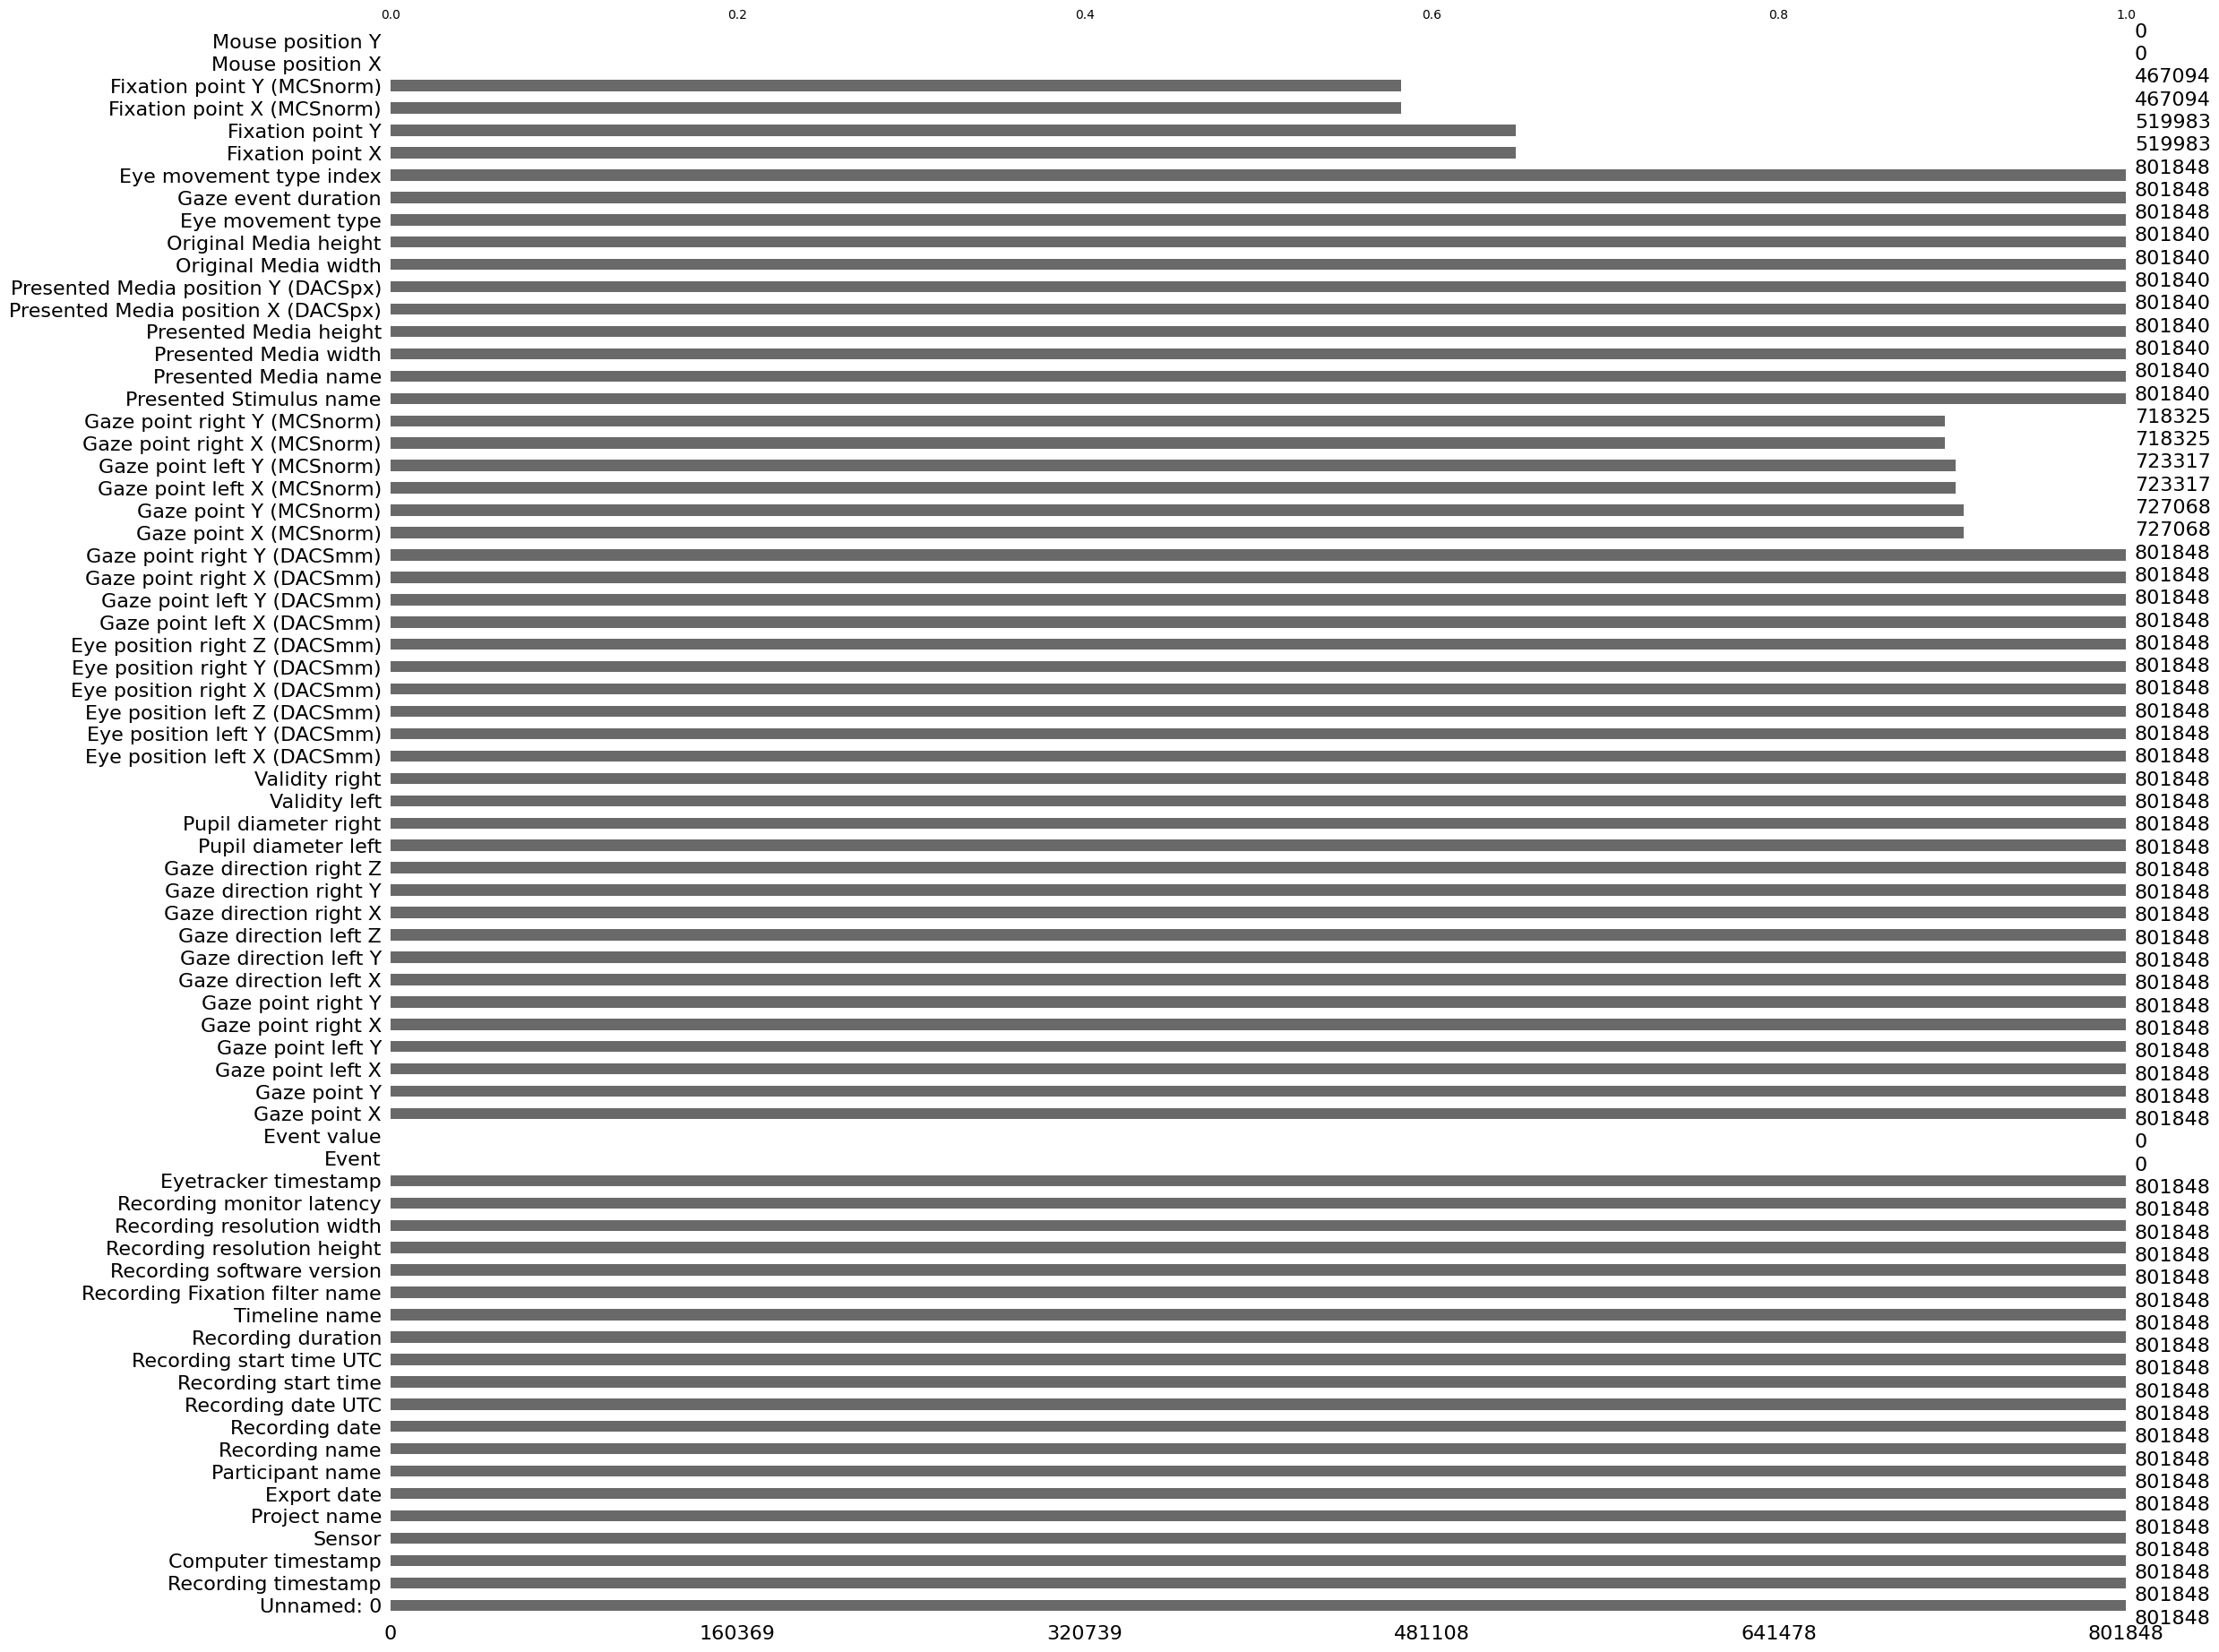

In [151]:
msno.bar(big_frame_dataset_III)

GRAPH FOR THE FLUCTUATION IN LEFT EYE'S PUPIL DIAMETER WITH RESPECT TO TIMESTAMP FOR TEST GROUP DATASET.

<Axes: xlabel='Pupil diameter left'>

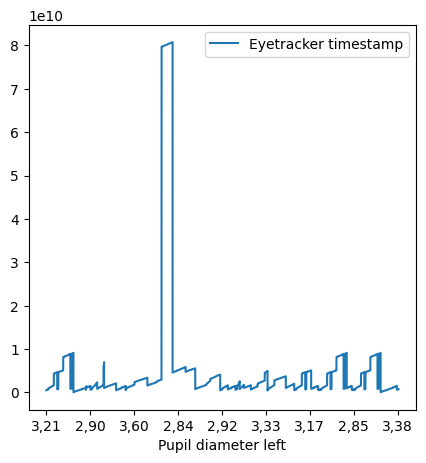

In [152]:
big_frame_dataset_III.plot(x="Pupil diameter left",y= "Eyetracker timestamp", kind="line", figsize=(5, 5))

GRAPH FOR THE FLUCTUATION IN RIGHT EYE'S PUPIL DIAMETER WITH RESPECT TO TIMESTAMP FOR TEST GROUP DATASET.

<Axes: xlabel='Pupil diameter right'>

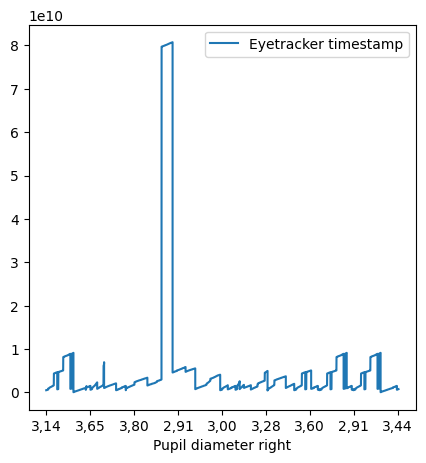

In [153]:
big_frame_dataset_III.plot(x="Pupil diameter right",y= "Eyetracker timestamp", kind="line", figsize=(5, 5))

CORELATION MATRIX FOR THE WHOLE DATASET OF TEST GROUP

C:\Users\Akshay Mohan Nair\AppData\Local\Temp\ipykernel_24020\392534988.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_co=big_frame_dataset_III.corr()


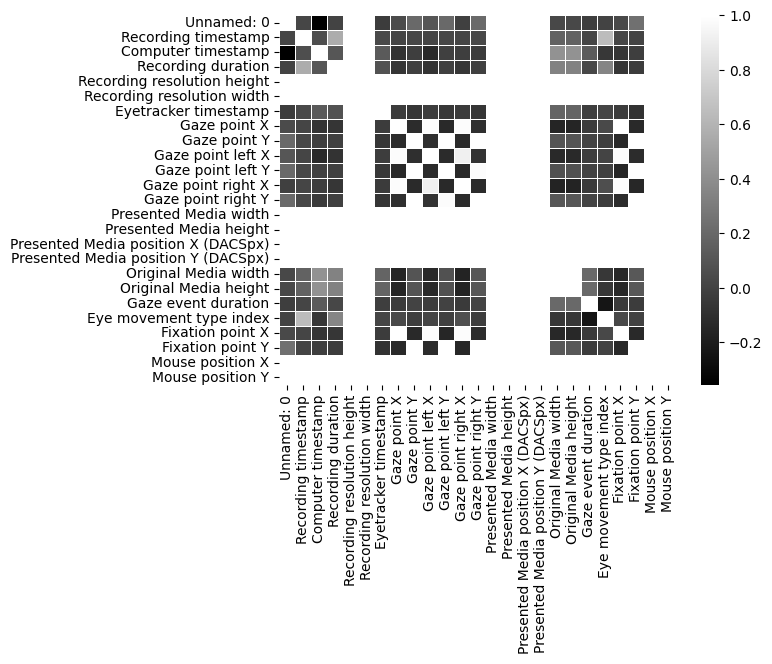

In [154]:
matrix_co=big_frame_dataset_III.corr()
sns.heatmap(matrix_co, cmap="gist_gray",linewidth=.5) #cmap = 'crest' for B and W heatmap
plt.show()

BAR GRAPH FOR THE COLUMNS IN THE DATASET-III.

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Recording timestamp'}>,
        <Axes: title={'center': 'Computer timestamp'}>,
        <Axes: title={'center': 'Recording duration'}>,
        <Axes: title={'center': 'Recording resolution height'}>],
       [<Axes: title={'center': 'Recording resolution width'}>,
        <Axes: title={'center': 'Eyetracker timestamp'}>,
        <Axes: title={'center': 'Gaze point X'}>,
        <Axes: title={'center': 'Gaze point Y'}>,
        <Axes: title={'center': 'Gaze point left X'}>],
       [<Axes: title={'center': 'Gaze point left Y'}>,
        <Axes: title={'center': 'Gaze point right X'}>,
        <Axes: title={'center': 'Gaze point right Y'}>,
        <Axes: title={'center': 'Presented Media width'}>,
        <Axes: title={'center': 'Presented Media height'}>],
       [<Axes: title={'center': 'Presented Media position X (DACSpx)'}>,
        <Axes: title={'center': 'Presented Media position Y (DACSpx)'}>,
      

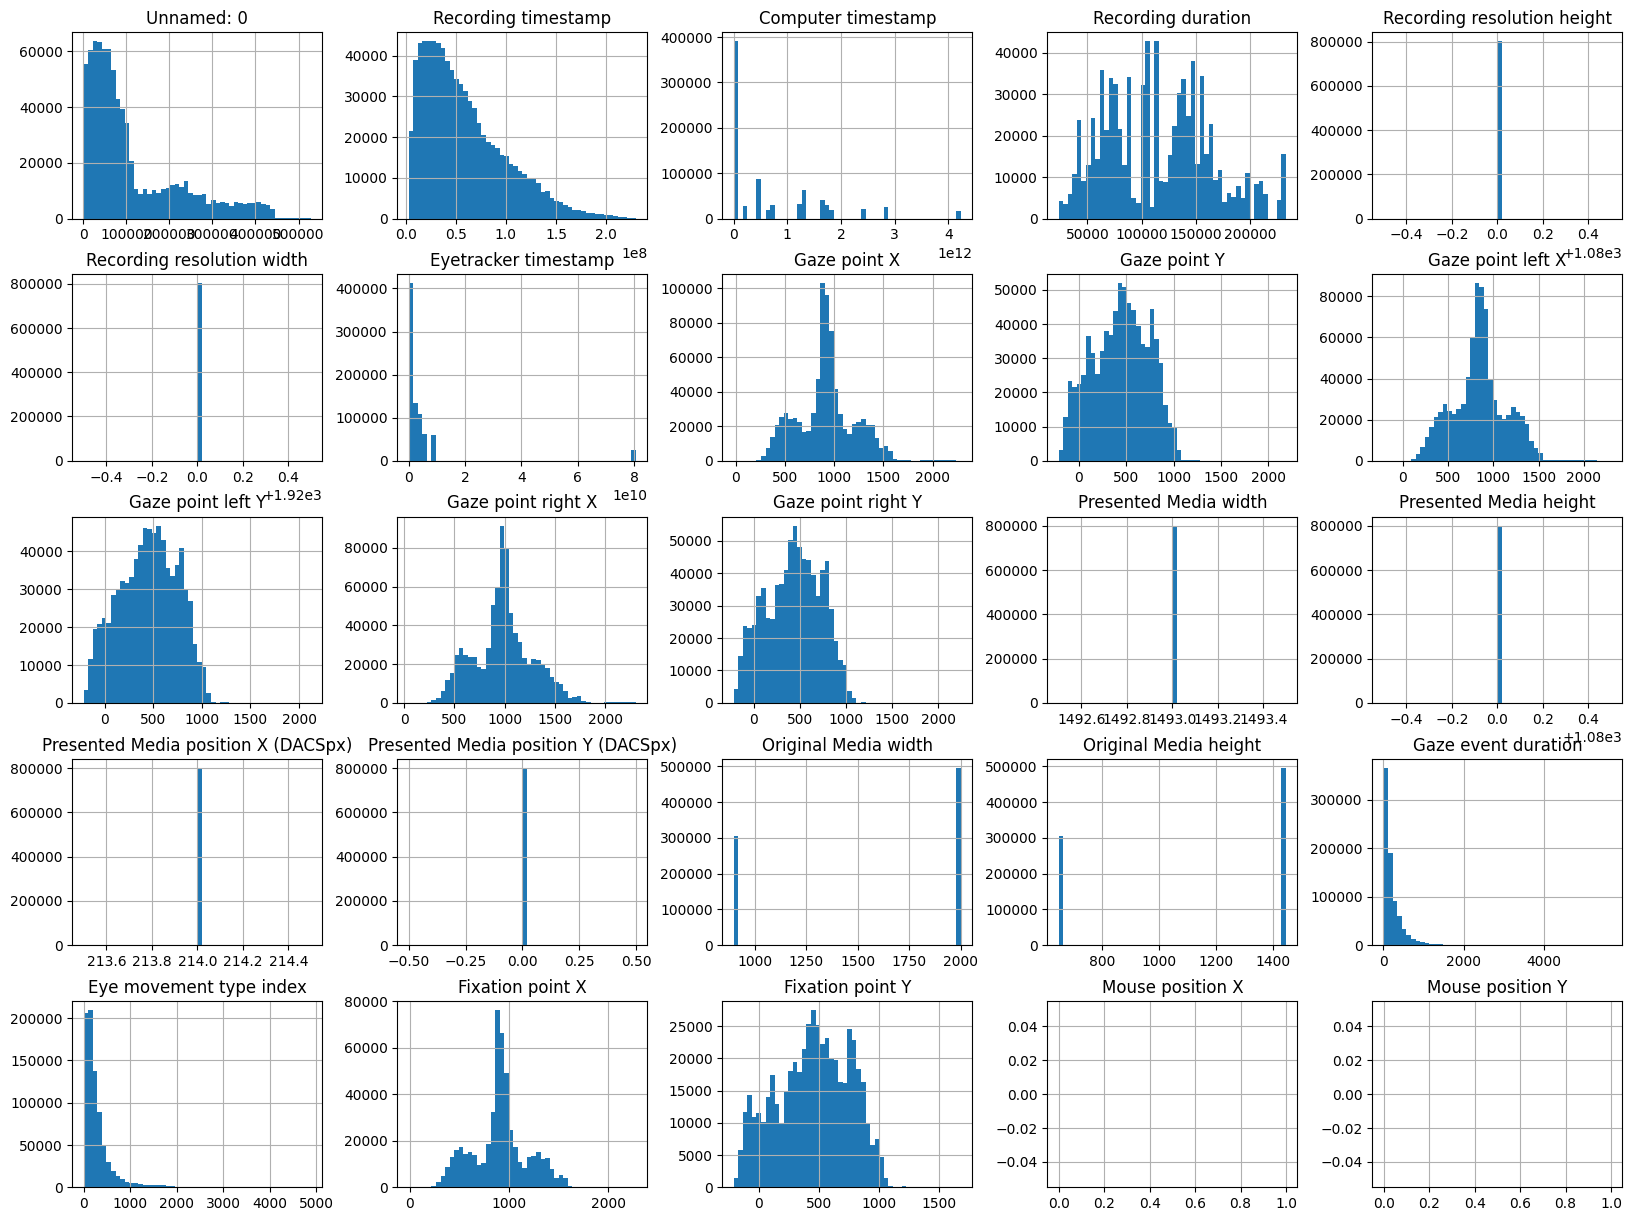

In [155]:
big_frame_dataset_III.hist(bins=50, figsize=(20,15))

PIE CHART FOR THE DIFFERENT VALUES IN THE COLUMN 'Eye movement type' IN DATASET-III

Fixation        519983
Saccade         182388
Unclassified     99477
Name: Eye movement type, dtype: int64


<Axes: ylabel='EYE MOVEMENT TYPE VALUE COUNTS'>

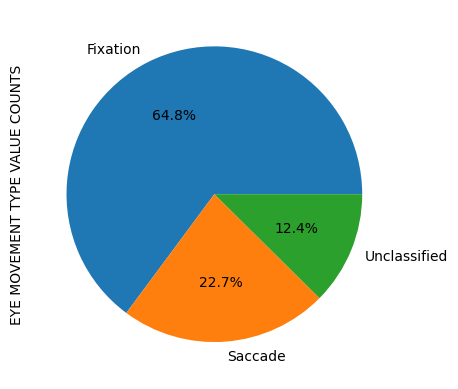

In [156]:
pie_chart = big_frame_dataset_III['Eye movement type'].value_counts(dropna=False)
print(pie_chart)
pie_chart.plot(kind="pie", autopct='%1.1f%%',    ylabel='EYE MOVEMENT TYPE VALUE COUNTS')

BELOW TABLE SHOWS THAT THE ADDED VALUE OF "GAZE POINT LEFT X" AND "SUM OF GAZE POINT RIGHT X" IS EQUAL TO "GAZE POINT X" IN DATASET-III

In [157]:
#Checking Values of Gaze Point X and Its Combined Value of Left and Right Eye
check_gaze = pd.DataFrame()
check_gaze['Added_value']=(big_frame_dataset_III['Gaze point left X']+ big_frame_dataset_III['Gaze point right X'])/2
check_gaze['Gaze point X'] = big_frame_dataset_III['Gaze point X']
check_gaze.head()


,Added_value,Gaze point X
4,962.0,962.0
7,977.0,977.0
10,975.0,975.0
13,990.0,990.0
16,980.5,981.0


BELOW CODE SHOWS THAT THE VALUE OF SUM OF "GAZE POINT LEFT X" AND "SUM OF GAZE POINT RIGHT X" IS EQUAL TO GAZE POINT X. THEREFORE THERE IS NO POINT IN TAKING THESE INDIVIDUAL COLUMNS INTO OUT FINAL DATASET.

THE VIOLET LINE JUST SHOWS THAT THE VALUES PERFECTLY OVERLAP EACH OTHER AS THE INDIVUAL COLOURS VALUES FOR THE LINES WERE RED AND BLUE.

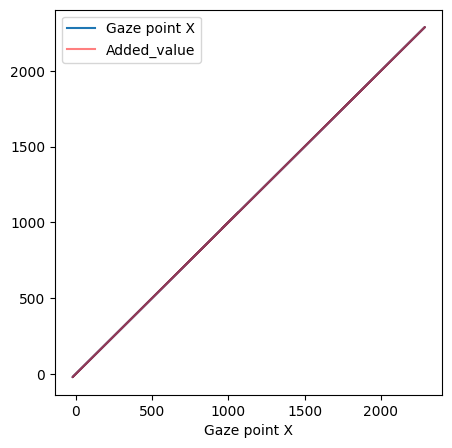

In [158]:
fig, ax = plt.subplots(figsize=(5,5))
check_gaze.plot(x="Added_value",kind="line", ax=ax)
check_gaze.plot(x="Gaze point X",kind="line", color="r", ax=ax,alpha=0.5)
plt.show()


# FEATURE SELECTION FOR DATASET-III

FROM THE ABOVE GRAPHS WE DECIDE TO SELECT THE BELOW FEATURES FROM OUR INTIAL DATASET FOR THE MODEL TO TRAIN UPON.

In [159]:
Selected_features = ['Participant name', 
                      'Gaze point X (MCSnorm)', 'Gaze point Y (MCSnorm)', 'Gaze event duration',
                     'Pupil diameter left','Pupil diameter right']

WE CONVERT THE PARTICIPANT NAME COLUMN'S DATATYPE TO INT FOR EASIER DATA MANIPULATION.

In [160]:
big_frame_dataset_III = big_frame_dataset_III[Selected_features].copy(deep=True)
big_frame_dataset_III['Participant name'] = big_frame_dataset_III['Participant name'].astype(int)

In [161]:
big_frame_dataset_III.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801848 entries, 4 to 3776737
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Participant name        801848 non-null  int32  
 1   Gaze point X (MCSnorm)  727068 non-null  object 
 2   Gaze point Y (MCSnorm)  727068 non-null  object 
 3   Gaze event duration     801848 non-null  float64
 4   Pupil diameter left     801848 non-null  object 
 5   Pupil diameter right    801848 non-null  object 
dtypes: float64(1), int32(1), object(4)
memory usage: 39.8+ MB


BELOW GRAPH SHOWS THE PERCENTAGE OF NULL VALUES IN THE SELECTED FEATURES IN DATASET-III.

<Axes: >

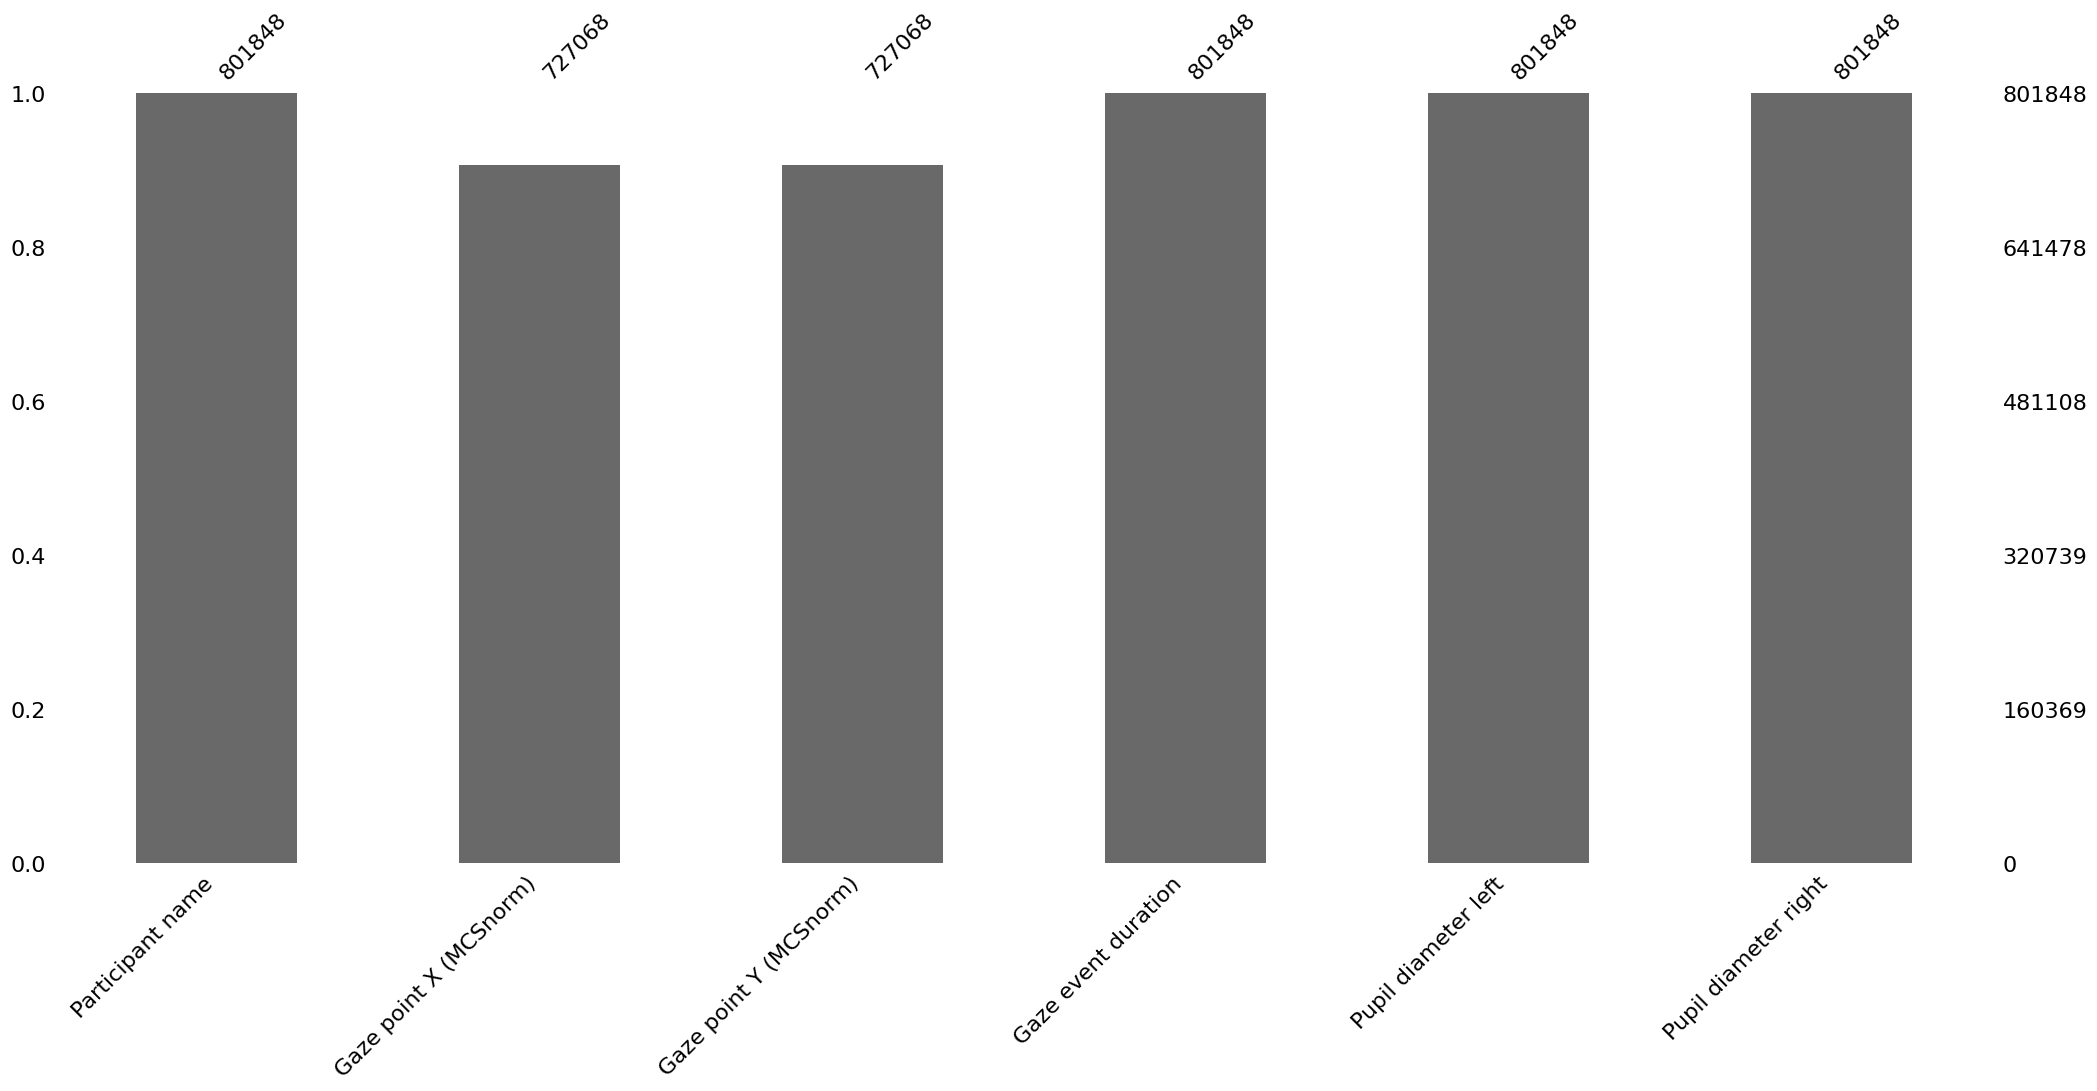

In [162]:
msno.bar(big_frame_dataset_III)

# REMOVING DUPLICATE ROWS

THE BELOW CODE SNIPPET REMOVES ALL THE DUPLICATE ROWS IN THE DATASET-III.

In [163]:
big_frame_dataset_III.drop_duplicates(inplace = True)
print('Shape After Removing Duplicates: ',big_frame_dataset_III.shape)


Shape After Removing Duplicates:  (501938, 6)


# CLEANING DATA FOR DATASET-III

WE CONVERT THE SELECTED FEATURES INTO FLOAT VALUES FOR BETTER DATA MANIPULATION AND INPUTE THE MISSING VALUES IN THE COLOUMN WITH THEIR MEAN VALUES.

In [164]:
remove_comma_column = ['Gaze point X (MCSnorm)','Gaze point Y (MCSnorm)','Pupil diameter left','Pupil diameter right']

for column_name in remove_comma_column:
    
    #Converting Coloumn to Float and Removing Commas(,) and Replacing with Dot(.)
    big_frame_dataset_III[column_name] = big_frame_dataset_III[column_name].str.replace(',','.')
    big_frame_dataset_III[column_name] = big_frame_dataset_III[column_name].astype(float)
    
    #Replacing the NAN values with Mean
    mean = big_frame_dataset_III[column_name].mean()
    big_frame_dataset_III[column_name] = big_frame_dataset_III[column_name].fillna(mean)
    
    print('Mean of Column:',column_name,' is: ',big_frame_dataset_III[column_name].mean())
    
big_frame_dataset_III

Mean of Column: Gaze point X (MCSnorm)  is:  0.4446060327871685
Mean of Column: Gaze point Y (MCSnorm)  is:  0.45486063337572247
Mean of Column: Pupil diameter left  is:  3.046954982487877
Mean of Column: Pupil diameter right  is:  3.063758810849148


,Participant name,Gaze point X (MCSnorm),Gaze point Y (MCSnorm),Gaze event duration,Pupil diameter left,Pupil diameter right,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,...,I complete the sentences of other people when they find it difficult to communicate their ideas to help them.,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other peoples sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended,Total Score original
0,2,0.440533,0.374516,162.826016,3.165732,3.179350,2,2,4,4,...,4,2,4,3,3,4,2,2,127,100
1,4,0.515884,0.454947,150.368682,3.195474,3.164896,2,3,3,3,...,4,2,3,4,3,2,4,2,120,95
2,6,0.535884,0.367661,227.433840,3.390199,3.765797,2,2,4,3,...,3,1,3,4,2,2,3,3,119,95
3,8,0.455073,0.362014,353.114232,4.175446,4.103152,1,3,1,3,...,3,4,2,2,2,1,1,4,98,76
4,10,0.498022,0.424051,337.241867,3.362648,3.197884,1,3,3,3,...,3,2,2,3,3,3,3,3,100,76
5,12,0.490163,0.601178,605.289691,3.177072,3.224082,3,3,4,4,...,4,3,3,3,3,3,2,2,124,97
6,14,0.472657,0.523055,164.340580,3.179130,3.389783,1,2,3,4,...,4,1,4,4,4,1,1,4,128,102
7,16,0.450070,0.381313,657.330080,3.098081,3.472844,2,2,3,2,...,2,2,2,3,3,2,2,3,106,84
8,18,0.444863,0.324602,673.762834,3.462571,3.062728,2,2,3,3,...,3,3,3,3,3,2,2,3,111,86
9,20,0.458906,0.390790,319.084895,3.269382,3.266601,2,3,4,4,...,4,3,4,4,4,3,2,4,142,110


WE GROUP ALL THE ROWS WITH SAME PARTICIPANTS NAME AND TAKE MEAN OF ALL THEIR OTHER COLUMNS IN ORDER TO REDUCE THE DATASET SIZE.

In [165]:
big_frame_dataset_III = big_frame_dataset_III.groupby('Participant name').mean().reset_index()

In [166]:
big_frame_dataset_III.to_csv('main_df_dataset_III.csv')

# MERGING DATASET-III WITH QUESTIONNAIRE

THE BELOW CODE SNIPPET MERGE THE SELECTED FEAUTRES DATASET WITH THE QUESTIONNAIRE DATASET ON THE BASIS OF THE PARTICIPANT NAME.

In [167]:
big_frame_dataset_III = big_frame_dataset_III.merge(quest_df, left_on='Participant name', right_on='Participant nr')
big_frame_dataset_III = big_frame_dataset_III.drop('Participant nr', axis=1)

In [168]:
big_frame_dataset_III.to_csv('merged_main_df_dataset_III.csv')

# SPLITTING THE MERGED DATASET FOR TRAINING AND TEST PURPOSES

In [173]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(big_frame_dataset_III.drop(['Participant name','Total Score original', 'Total Score extended'], axis=1), big_frame_dataset_III['Total Score extended'], test_size=0.3, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# MODEL CREATION FOR TEST GROUP

## MODEL 1: LINEAR REGRESSION MODEL FOR TEST GROUP

In [174]:
# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

TRAINING AND MAKING PREDICTIONS USING THE LINEAR REGRESSION MODEL.
THE BELOW CODE SNIPPET PRIDICTS EMPATHY SCORE USING ALL THE SELECTED FEATURES AND THE QUESTIONNARIE DATASET.

In [175]:
# Evaluate the model on the testing data
y_pred = lr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 7.769960173495856
Mean Absolute Error: 2.172645972915788
R2 Score: 0.9299458176699505


BELOW CODE SNIPPED TRIES TO PREDICT EMPATHY SCORE USING JUST THE PUPIL DIAMETER FOR TEST GROUP DATA.

In [177]:
# Extract the input features and the target variable
X = big_frame_dataset_III[['Pupil diameter left', 'Pupil diameter right']]
y = big_frame_dataset_III['Total Score extended']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model and train it on the training set
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Use the trained model to predict on the test set
y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('mse',mse)
# Evaluate the model's performance on the test set using mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")
print(f"R SQUARED: {r2}")

mse 122.17842721259387
Mean squared error: 122.17842721259387
R SQUARED: -0.23239657597460894


In [179]:
inputs = big_frame_dataset_III.columns[0:4]
target_outputs = big_frame_dataset_III.columns[-1:]

MAKING EMPAHY SCORE PREDICTIONS USING THE PUPIL DIAMETERS AND THE QUESTIONNAIRE AS SUGGESTED IN THE PAPER.

In [180]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(big_frame_dataset_III.drop(inputs, axis=1), big_frame_dataset_III[target_outputs], test_size=0.3, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


EMPATHY PREDICTION USING PUPIL DIAMETER AND QUESTIONNAIRE USING LINEAR REGRESSION MODEL.

In [181]:
# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
# Evaluate the model on the testing data
y_pred = lr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 6.372103649983433
Mean Absolute Error: 1.9708749159259074
R2 Score: 0.9358513055370795


## MODEL 2: NEURAL NETWORKS FOR TEST GROUP

In [182]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(big_frame_dataset_III.drop(['Participant name','Total Score original', 'Total Score extended'], axis=1), big_frame_dataset_III['Total Score extended'], test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [197]:

# Defining the model
model = keras.Sequential([
    keras.layers.Conv1D(32, kernel_size=7, activation='relu', input_shape=[X_train_scaled.shape[1], 1]),
    keras.layers.MaxPooling1D(pool_size=2),
    #keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    #keras.layers.MaxPooling1D(pool_size=2),
    #keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    #keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=1000, batch_size=4)

# Evaluate the model on test data
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


Epoch 1/1000
4/4 [==============================] - 0s 37ms/step - loss: 15161.2334 - val_loss: 15629.0127
Epoch 2/1000
4/4 [==============================] - 0s 14ms/step - loss: 14702.4297 - val_loss: 14904.2783
Epoch 3/1000
4/4 [==============================] - 0s 15ms/step - loss: 13591.9004 - val_loss: 13270.5420
Epoch 4/1000
4/4 [==============================] - 0s 11ms/step - loss: 11338.7842 - val_loss: 10056.9277
Epoch 5/1000
4/4 [==============================] - 0s 17ms/step - loss: 7504.1250 - val_loss: 4930.8975
Epoch 6/1000
4/4 [==============================] - 0s 14ms/step - loss: 3722.2500 - val_loss: 561.8934
Epoch 7/1000
4/4 [==============================] - 0s 12ms/step - loss: 2487.6443 - val_loss: 173.5378
Epoch 8/1000
4/4 [==============================] - 0s 14ms/step - loss: 2165.3003 - val_loss: 225.5060
Epoch 9/1000
4/4 [==============================] - 0s 16ms/step - loss: 725.5397 - val_loss: 513.9631
Epoch 10/1000
4/4 [==============================] -

In [198]:
# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Squared Error: 1153.0525821626975
Mean Absolute Error: 28.05339813232422
Root Mean Squared Error: 33.95662795630181
R-squared Score: -9.395954937130288
